## Problem

Logistic regression. Using the data provided (Logistic_regression_ls.csv),
plot the decision boundary (linear) using Optimization of the sigmoid function.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Two class problem')

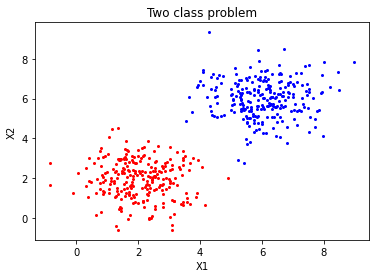

In [4]:
# plotting the data to visualize
data = pd.read_csv('Logistic_regression_ls.csv')

X1 = data.iloc[:, 0]
X2= data.iloc[:, 1]
Y= data.iloc[:, 2]
plt.scatter(X1[Y==0], X2[Y==0], s=4, c='r')
plt.scatter(X1[Y==1], X2[Y==1], s=4, c='b')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Two class problem')

In [5]:
# define Hypothesis functiom

def Hw(w,x):
    return 1/(1+np.exp(-sum(np.transpose(w)*x)))



In [6]:
#define loss function

def J(m,W,X,Y):
    su=0
    
    for i in range(1,m+1):
        su+=(1/m)*(-Y[i-1]*np.log(Hw(W,X[i-1]))-(1-Y[i-1])*np.log(1-Hw(W,X[i-1])))    
    return su
                

In [7]:
# define gradient of loss function

def GradeJ(m,W,X,Y):
    GJ=[]
    n=len(X[0])
    for j in range(n):
        gj=0
        for i in range(1,m+1):
            gj+=(1/m)*(Hw(W,X[i-1])-Y[i-1])*X[i-1][j]
        GJ.append(gj)
        
    return GJ


In [13]:
# function to find optimum weights and drawing decision boundary



def Linear_LogRegr(m,alpha,X,Y,X1,X2):
    
    W=np.zeros(len(X[0]))   # initialize weights
    loss_fu=[]
    K=[]
    epoch=1000
    
    for k in range(epoch):
        
        for j in range(len(X[0])):
            w=W[j]-alpha*GradeJ(m,W,X,Y)[j]
            W[j]=w
        
        #print("No. of iteration: ",k)
        #print(W)
        
        K.append(k)
        loss_fu.append(J(m,W,X,Y))
        
        from numpy import linalg
        
        if np.linalg.norm(W)<=0.001:         # stopping condition
            print("The final weights are: ",W)
            break
    
    plt.subplot(1, 2, 1)
    plt.plot(K,loss_fu)
    plt.title('Loss Function v/s iteration')
    
    plt.subplot(1, 2, 2)
    s=lambda r:(-W[0]-W[1]*r)/(W[2])
    S=s(X1)
    plt.plot(X1,S)
    plt.scatter(X1[Y==0], X2[Y==0], s=6, c='r')
    plt.scatter(X1[Y==1], X2[Y==1], s=6, c='b')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Boundary')
    
    plt.show()

    
    return print("Final weights are: ",W)
            
    

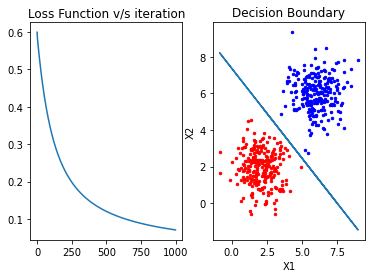

Final weights are:  [-5.86666205  0.78317382  0.79598696]


In [14]:
# implementing the linear logistic regression

data = pd.read_csv('Logistic_regression_ls.csv')

X1 = data.iloc[:, 0]
X2= data.iloc[:, 1]
Y= data.iloc[:, 2]
X0=np.ones(len(X1))
X=list(zip(X0,X1,X2))
m=len(Y)
W=np.zeros(len(X[0]))
alpha=0.1


Linear_LogRegr(m,alpha,X,Y,X1,X2)